In [1]:
import os
import mahotas as mh
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.html.widgets import interact, fixed
import pandas as pd
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # 10 x 8 inches
plt.gray()

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Conv2D
from keras.optimizers import SGD
from keras import metrics
import PIL.Image as Image
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [3]:
import warnings
warnings.filterwarnings('ignore')

####Tutorial

In [64]:
# Generate dummy data
x_train = np.random.random((100, 100, 100, 1))
y_train = keras.utils.to_categorical(np.random.randint(1, size=(100, 1)), num_classes=2)
x_test = np.random.random((20, 100, 100, 1))
y_test = keras.utils.to_categorical(np.random.randint(1, size=(20, 1)), num_classes=2)

In [65]:
x_train[0].shape

(100, 100, 1)

In [108]:
x_train

array([[[[ 0.3227883 ],
         [ 0.61102734],
         [ 0.09832863],
         ..., 
         [ 0.78658118],
         [ 0.34987004],
         [ 0.98104504]],

        [[ 0.08799617],
         [ 0.05355093],
         [ 0.71008655],
         ..., 
         [ 0.63288824],
         [ 0.01906753],
         [ 0.39738982]],

        [[ 0.66177425],
         [ 0.99786865],
         [ 0.48563119],
         ..., 
         [ 0.59688706],
         [ 0.31943107],
         [ 0.96794632]],

        ..., 
        [[ 0.61084186],
         [ 0.74834123],
         [ 0.66916319],
         ..., 
         [ 0.94162342],
         [ 0.77805944],
         [ 0.09114411]],

        [[ 0.56938139],
         [ 0.50796703],
         [ 0.79520696],
         ..., 
         [ 0.4745386 ],
         [ 0.88605828],
         [ 0.46514373]],

        [[ 0.01212888],
         [ 0.90188337],
         [ 0.58200496],
         ..., 
         [ 0.1909767 ],
         [ 0.88917859],
         [ 0.38708265]]],


       [[[ 0.30441

In [66]:
y_train[0]

array([ 1.,  0.])

In [67]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [68]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [69]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [70]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd)

In [71]:
model.fit(x_train, y_train, batch_size=32, epochs=10)
score = model.evaluate(x_test, y_test, batch_size=32)

Epoch 1/10
100/100 [==============================] - 2s - loss: 0.4231     
Epoch 2/10
100/100 [==============================] - 2s - loss: 0.0025     
Epoch 3/10
100/100 [==============================] - 2s - loss: 1.1375e-05     
Epoch 4/10
100/100 [==============================] - 2s - loss: 1.1921e-07     
Epoch 5/10
100/100 [==============================] - 2s - loss: 1.1921e-07     
Epoch 6/10
100/100 [==============================] - 2s - loss: 1.1921e-07     
Epoch 7/10
100/100 [==============================] - 2s - loss: 1.1921e-07     
Epoch 8/10
100/100 [==============================] - 2s - loss: 1.1921e-07     
Epoch 9/10
100/100 [==============================] - 2s - loss: 1.1921e-07     
Epoch 10/10
20/20 [==============================] - 0s


####The real thing

In [39]:
species = 'leptothorax'
image_size = 50

In [40]:
larvae_files = os.listdir('/cellar/users/ramarty/Data/ants/version2.0/training/{0}/size_{1}/larvae'.format(species, image_size))[:1000]
pupae_files = os.listdir('/cellar/users/ramarty/Data/ants/version2.0/training/{0}/size_{1}/pupae'.format(species, image_size))[:1000]
other_files = os.listdir('/cellar/users/ramarty/Data/ants/version2.0//training/{0}/size_{1}/other'.format(species, image_size))[:2000]

In [41]:
larvae_images = [np.expand_dims(Image.open('/cellar/users/ramarty/Data/ants/version2.0/training/{0}/size_{1}/larvae/{2}'.format(species, image_size, x)), axis=2) for x in larvae_files] + [np.expand_dims(Image.open('/cellar/users/ramarty/Data/ants/version2.0/training/{0}/size_{1}/pupae/{2}'.format(species, image_size, x)), axis=2) for x in pupae_files]
other_images = [np.expand_dims(Image.open('/cellar/users/ramarty/Data/ants/version2.0/training/{0}/size_{1}/other/{2}'.format(species, image_size, x)), axis=2) for x in other_files]

In [42]:
images = np.array(larvae_images + other_images)
classifications = [[1,0] for x in larvae_images] + [[0,1] for x in other_images]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(images, classifications, test_size=0.33, random_state=42)

In [53]:
X_train[0].shape

(50, 50, 1)

In [54]:
num_train = len(X_train)
num_test = len(X_test)

In [55]:
model = Sequential()
# input: 100x100 images with 3 channels -> (100, 100, 3) tensors.
# this applies 32 convolution filters of size 3x3 each.
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(50, 50, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [56]:
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

In [57]:
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [58]:
sgd = SGD(lr=1, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', metrics=[metrics.categorical_accuracy], optimizer=sgd)

In [59]:
history_callback = model.fit(X_train, y_train, batch_size=10, epochs=10)
score = model.evaluate(X_test, y_test, batch_size=32)

Epoch 1/10
2010/2010 [==============================] - 14s - loss: 5.2816 - categorical_accuracy: 0.6716    
Epoch 2/10
2010/2010 [==============================] - 14s - loss: 5.2845 - categorical_accuracy: 0.6721    
Epoch 3/10
2010/2010 [==============================] - 14s - loss: 5.2845 - categorical_accuracy: 0.6721    
Epoch 4/10
2010/2010 [==============================] - 14s - loss: 5.2845 - categorical_accuracy: 0.6721    
Epoch 5/10
2010/2010 [==============================] - 14s - loss: 5.2845 - categorical_accuracy: 0.6721    
Epoch 6/10
2010/2010 [==============================] - 14s - loss: 5.2845 - categorical_accuracy: 0.6721    
Epoch 7/10
2010/2010 [==============================] - 14s - loss: 5.2845 - categorical_accuracy: 0.6721    
Epoch 8/10
2010/2010 [==============================] - 14s - loss: 5.2845 - categorical_accuracy: 0.6721    
Epoch 9/10
2010/2010 [==============================] - 14s - loss: 5.2845 - categorical_accuracy: 0.6721    
Epoch 10/1

In [60]:
history_callback.history["categorical_accuracy"]

[0.6716417938989786,
 0.67213930560285184,
 0.67213930567698688,
 0.67213930478736539,
 0.67213930545458156,
 0.67213930693728419,
 0.6721393050097707,
 0.67213930864239213,
 0.67213930582525716,
 0.67213930575112202]

In [73]:
score[1]

0.90292758089368264

####Test on sample photo

In [17]:
cfellah_test_files = list(set([x.split('.')[0] for x in os.listdir('/cellar/users/ramarty/Data/ants/photos/') if ('2017' in x) or ('2016' in x)]))[-5:]

In [64]:
test_photo = cfellah_test_files[0]
step = 25
image_size = 50

In [65]:
np.expand_dims(np.array(image[i:i+image_size, j:j+image_size]), axis=0).shape

(1, 50, 50, 1)

In [66]:
print np.newaxis

None


In [67]:
# Import classifier
#model = load_model('/cellar/users/ramarty/Data/ants/version4.0/classifiers/{0}/convnet.size_{1}.h5'.format(species, image_size))

# Makes several predictions for each pixel
image = np.expand_dims(Image.open('/cellar/users/ramarty/Data/ants/photos/{0}.pgm'.format(test_photo)), axis=2)
x_total, y_total = image.shape[1], image.shape[0]
prediction_matrix = [[[] for k in range(x_total)] for l in range(y_total)]
# cycle through photo
print y_total, x_total
for i_index, i in enumerate(range(0, y_total-(image_size), step)):
    print i_index
    for j_index, j in enumerate(range(0, x_total-(image_size), step)):
        #print np.expand_dims(np.array(image[i:i+image_size, j:j+image_size]), axis=0).shape
        #print j, j_index
        prediction = model.predict(np.expand_dims(np.array(image[i:i+image_size, j:j+image_size]), axis=0))
        for i_single in range(i, i+image_size):
            for j_single in range(j, j+image_size):
                try:
                    prediction_matrix[i_single][j_single].append(prediction)
                except:
                    None

4560 3048
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180


In [79]:
recombination = 'mean'

In [80]:
# Sumarizes the predictions for each pixel
summary_matrix = [[0 for k in range(x_total)] for l in range(y_total)]
for i_index, i in enumerate(range(y_total)):
    for j_index, j in enumerate(range(x_total)):
        if recombination == 'percentile':
            summary_matrix[i_index][j_index] = np.percentile(prediction_matrix[i_index][j_index], 35)
        elif recombination == 'median':
            summary_matrix[i_index][j_index] = np.median(prediction_matrix[i_index][j_index])
        else: # mean
            summary_matrix[i_index][j_index] = np.mean(prediction_matrix[i_index][j_index])

IndexError: index 1 is out of bounds for axis 0 with size 1

In [74]:
import pickle

In [76]:
prediction_matrix_np = np.matrix(summary_matrix)
prediction_matrix_np = np.nan_to_num(prediction_matrix_np)
pickle.dump(prediction_matrix_np, open("/cellar/users/ramarty/Data/ants/version4.0/predictions/{0}/{1}.{2}.{3}.{4}.p".format(species, test_photo, image_size, step, recombination), "wb"))

In [ ]:
# numpy can resize with nearest neighbor

#### Visualize

In [77]:
def f(x):
    if ((x[0] == 246) & (x[1] == 255) & (x[2] == 0)) | ((x[0] == 169) & (x[1] == 206) & (x[2] == 114)) | ((x[0] == 251) & (x[1] == 175) & (x[2] == 93)):
        return 1
    else:
        return 0

def plot_results(prediction_matrix, test_file_gs):
    plt.figure(figsize=(6,8))
    # predictions
    sns.heatmap(prediction_matrix)
    plt.show()
    plt.clf()
    # gold standard
    im = mh.imread(test_file_gs)
    plt.imshow(im)
    plt.show()
    plt.clf()

In [ ]:
# need to update to new metrics

72566 36283.0
True Positive Rate: 0.5
False Positive Rate: 0.495113303517


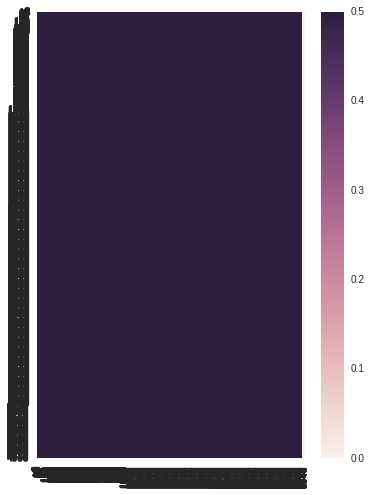

In [78]:
prediction_matrix = pickle.load(open("/cellar/users/ramarty/Data/ants/version4.0/predictions/{0}/{1}.{2}.{3}.{4}.p".format(species, test_photo, image_size, step, recombination), "rb"))
gold_standard = mh.imread('/cellar/users/ramarty/Data/ants/photos/{0}.png'.format(test_photo))

# make gold standard binary for comaprison
gs_binary = np.arange(len(gold_standard)*len(gold_standard[0])).reshape(len(gold_standard), len(gold_standard[0]))
for row in range(len(gold_standard)):
    for col in range(len(gold_standard[0])):
        gs_binary[row][col] = f(gold_standard[row][col])

diff = gs_binary - prediction_matrix
total_dim = gs_binary.shape[0] * gs_binary.shape[1]
tpr = 1 - (diff[(diff > 0)].sum() / gs_binary.sum())
fpr = abs(diff[(diff < 0)].sum()) / (total_dim - gs_binary.sum()) # okay -- doesn't account for lightly colored

print gs_binary.sum(), diff[(diff > 0)].sum()
print 'True Positive Rate:', tpr
print 'False Positive Rate:', fpr

# Save results to a txt file
with open("/cellar/users/ramarty/Data/ants/version4.0/predictions/{0}/{1}.{2}.{3}.{4}.txt".format(species, test_photo, image_size, step, recombination), 'w') as outfile:
    outfile.write('True Positive Rate: {0}\n'.format(tpr))
    outfile.write('False Positive Rate: {0}\n'.format(fpr))

# Save images to a file
plt.figure(figsize=(6,8))
sns.heatmap(prediction_matrix)

####Extend to three classes